In [75]:
!pip install statsmodel

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


from statsmodels.tsa.statespace.sarimax import SARIMAX

ModuleNotFoundError: No module named 'statsmodels'

In [60]:
df=pd.read_csv('Ginger.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df=df[['Minimum','Maximum','Average']]
df.head(10)

,Minimum,Maximum,Average
Date,,,
2013-06-16,140,150,145.0
2013-06-17,140,150,145.0
2013-06-18,140,150,145.0
2013-06-19,140,150,145.0
2013-06-20,140,150,145.0
2013-06-21,130,140,135.0
2013-06-25,140,150,145.0
2013-06-26,130,140,135.0
2013-06-27,130,140,135.0


In [61]:
window_size = 30  # Adjust the window size as needed
#df['Min_MA'] = df['Minimum'].rolling(window=window_size).mean()
#df['Max_MA'] = df['Maximum'].rolling(window=window_size).mean()
df['Avg_MA'] = df['Average'].rolling(window=window_size).mean()


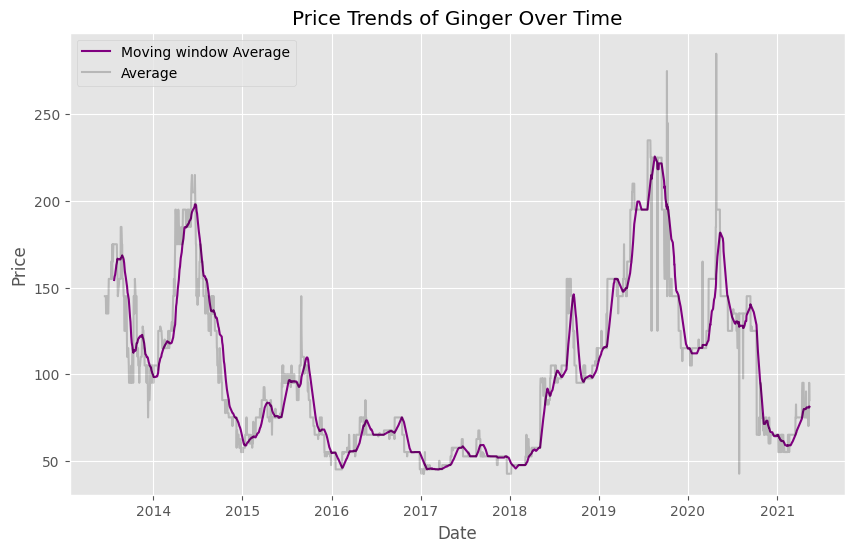

In [70]:
# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

plt.plot(df.index, df['Avg_MA'], label='Moving window Average',color='Purple')
plt.plot(df.index, df['Average'], label='Average', alpha=0.2, color='Black')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')  # You can adjust the y-axis label accordingly
plt.title('Price Trends of Ginger Over Time')

# Adding legend
plt.legend()

# Display the plot
plt.show()



In [72]:

# Create a feature for the time index
df['TimeIndex'] = range(1, len(df) + 1)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define features (X) and target variable (y)
X_train, y_train = train[['TimeIndex']], train['Average']
X_test, y_test = test[['TimeIndex']], test['Average']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1412.5141378053977


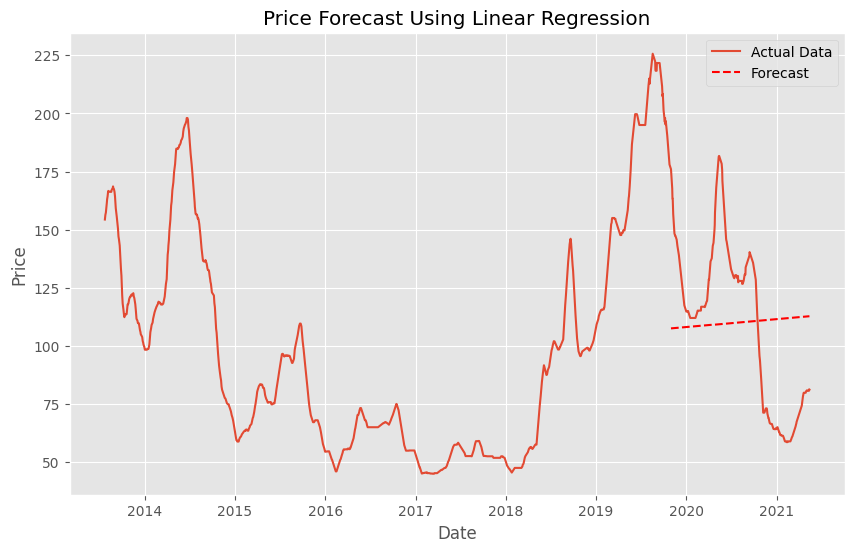

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Avg_MA'], label='Actual Data')
plt.plot(test.index, predictions, label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Forecast Using Linear Regression')
plt.legend()
plt.show()